# Load modules

In [ ]:
%matplotlib inline
import pyseb
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# initialize semic module
semic = pyseb.SEMIC()

In [ ]:
nx = 1
semic.Initialize(nx)
print(f'   tmin = {semic.Param.tmin}')
print(f'   tmax = {semic.Param.tmax}')

# Plot albedo integration

* Use Oerlemans et al. (1998)
* Use ISBA-MEB (Napoly et al., 2020)

References
* Oerlemans, J., & Knap, W. H. (1998). A 1 year record of global radiation and albedo in the ablation zone of Morteratschgletscher, Switzerland. Journal of Glaciology, 44(147), 231–238. https://doi.org/10.3189/S0022143000002574
* Napoly, A., Boone, A., & Welfringer, T. (2020). ISBA-MEB (SURFEX v8.1): Model snow evaluation for local-scale forest sites. Geoscientific Model Development, 13(12), 6523–6545. https://doi.org/10.5194/gmd-13-6523-2020


In [ ]:
hsnow = np.linspace(0, 5, 101).reshape((-1,1))
alb_smax = 0.85
albi = 0.6

f_alb1 = 1 - np.exp(-hsnow/1)
f_alb2 = np.min(hsnow/1, initial=1.0, axis=1).reshape((-1,1))
f_alb2 = np.max(f_alb2, axis=1, initial=0.0)

fig, ax = plt.subplots()
ax.plot(hsnow, f_alb1, label='Oerlemans')
ax.plot(hsnow, f_alb2, label='ISBA-MEB')
ax.set_xlabel('surface temperature (K)')
ax.set_ylabel('albedo fraction (-)')

# Plot Slater's snow albedo

In [ ]:
tsurf = np.linspace(273.15-50, 273.15, 101)
albs  = np.zeros(np.shape(tsurf))
# tmin  = semic.Param.tmin
tmin  = 273.15-10
tmax  = semic.Param.tmax
alb_smax = 0.85
alb_smin = 0.5
for i in range(len(tsurf)):
	albs[i] = semic.Albedo_Slater(tsurf[i], tmin, tmax, alb_smax, alb_smin)

fig, ax = plt.subplots()
ax.plot(tsurf, albs)
ax.set_xlabel('surface temperature (K)')
ax.set_ylabel('snow albedo (-)')

# Plot Denby's albedo scheme

$$
\alpha_{s} = \alpha_{s,\min} + (\alpha_{s,\max} - \alpha_{s,\min}) \exp{\left( \frac{-M}{M_{crit}} \right)}
$$

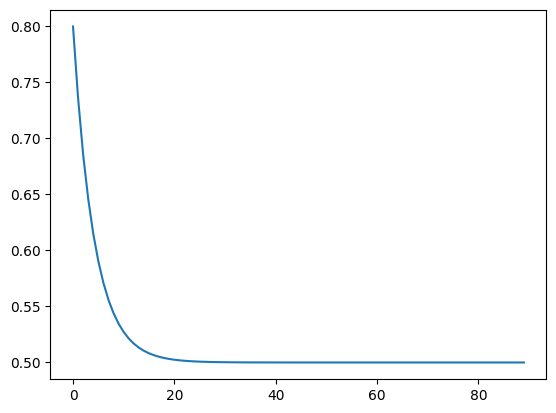

In [ ]:
alb_smin = 0.5
alb_smax = 0.8

dt = 24*3600 # 1day
ntime = 90 # 90 days
alb = np.zeros((ntime,))
tau_f = 0.24
alb[0] = alb_smax
for i in range(ntime-1):
    # melting during 90 days
    alb[i+1] = (alb[i]-alb_smin) * np.exp(-tau_f) + alb_smin

    alb[i+1] = min(alb[i+1], alb_smax)
    alb[i+1] = max(alb[i+1], alb_smin)
    
fig, ax = plt.subplots()
ax.plot(np.arange(ntime), alb)
